In [1]:
import scanpy as sc

import sys
sys.path.append("../")

## Example 3: Infer Copy Number Variation

In [2]:
import echidna as ec
ec.pl.activate_plot_settings()
%load_ext autoreload
%autoreload 2

The following file contains data from a previous training run. The functions in this tutorial will rely on the model saves referenced in this file to perform learning and inference of CNV. See the first tutorial for further details.

In [3]:
adata = sc.read_h5ad("data/F01_on_echidna.h5")

To infer copy number variation, Echinda relies on positional information of genes on cytobands with a Gaussian Hidden Markov Model. In the default setting, Echinda calls a pre-configured genome with mappings of genes to bands using the UCSC hg38 database. Later in the tutorial, we will see guidelines for use of your own genome.

In [4]:
ec.tl.infer_cnv(adata)

2024-07-24 03:12:17,577 | INFO : `genome` not set, defaulting to hg38cytoBands and wgEncodeGencodeCompV46.
2024-07-24 03:12:45,287 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


Plot amplifications (red), deletions (blue), and no change (gray) in bands for a given cluster:

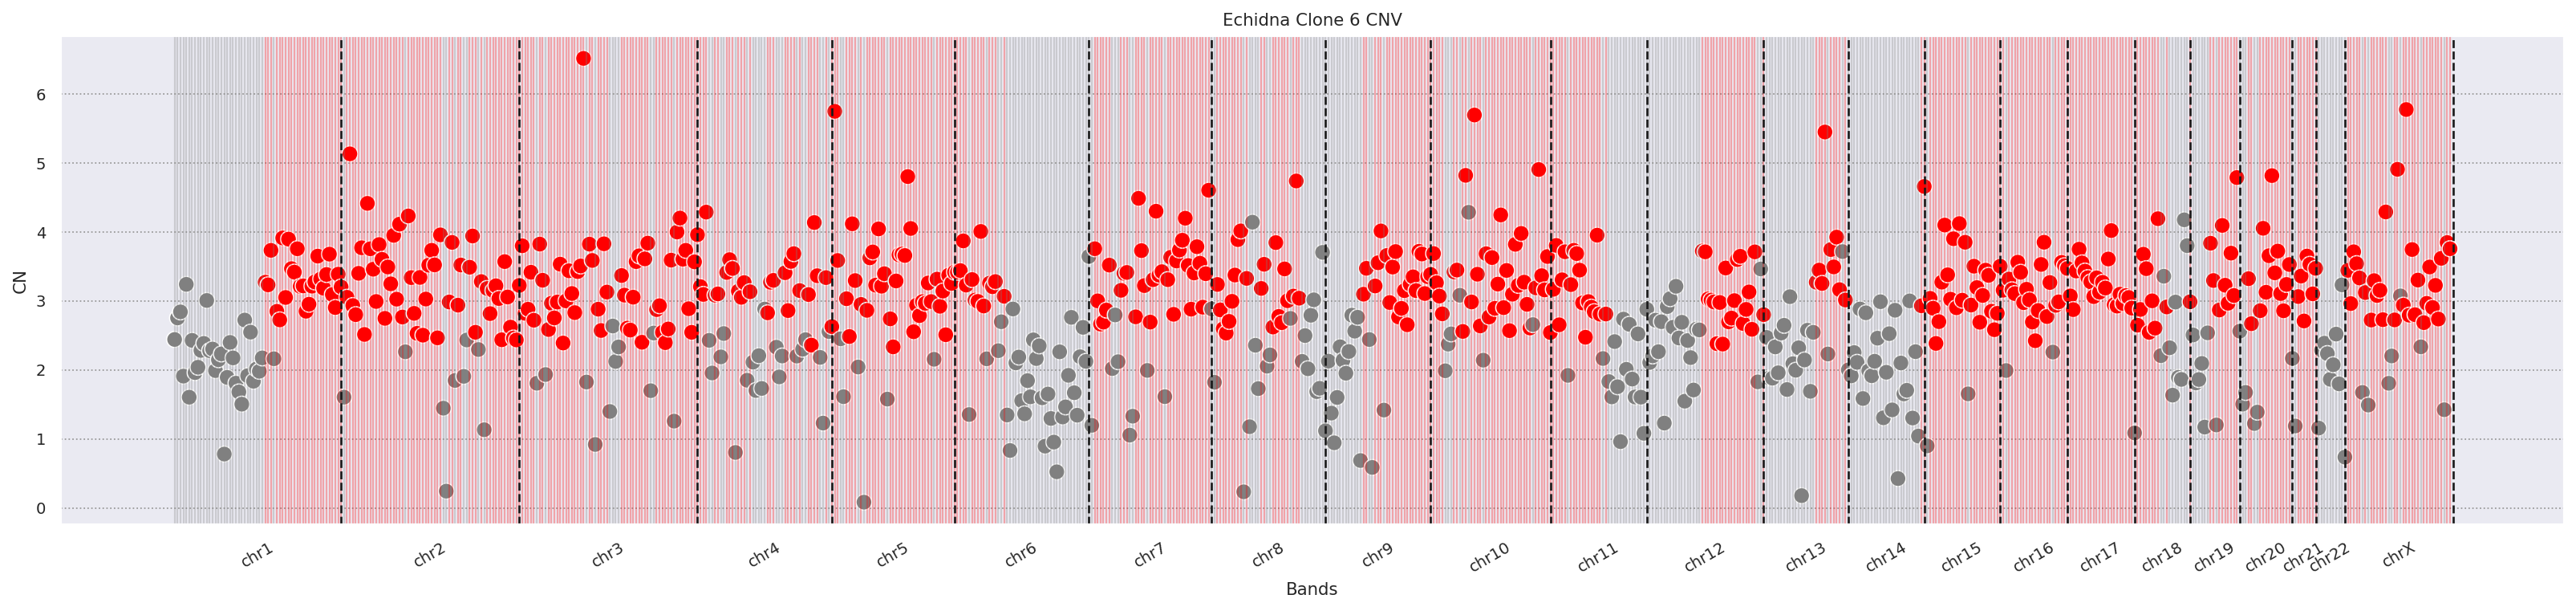

In [5]:
ec.pl.plot_cnv(adata, 6)

The underlying results can be fetched from the `adata` object:

In [6]:
ec.tl.cnv_results(adata)

band  echidna_clone_0  echidna_clone_1  echidna_clone_2  \
0    chr1_p36.33         2.331744         2.371032         2.291838   
1    chr1_p36.32         2.758336         2.799171         2.868151   
2    chr1_p36.31         2.778865         2.775537         2.686243   
3    chr1_p36.23         2.012831         1.908824         1.719159   
4    chr1_p36.22         3.331998         3.343719         3.332197   
..           ...              ...              ...              ...   
775   chrX_q26.3         2.736874         2.974256         3.103614   
776   chrX_q27.1         3.505254         3.538708         3.953594   
777   chrX_q27.2         1.154760         1.576276         1.591180   
778   chrX_q27.3         3.865502         3.876410         3.982015   
779     chrX_q28         3.447174         3.519101         3.624879   

     echidna_clone_3  echidna_clone_4  echidna_clone_5  echidna_clone_6  \
0           2.529686         2.628132         2.637540         2.440517   
1           2.804361         3.386354         2.985591         2.752696   
2           3.208528         2.955449         3.007459         2.840427   
3           2.254502         2.225444         2.262292         1.909111   
4           3.473391         3.497721         3.336827         3.239413   
..               ...              ...              ...              ...   
775         2.870508         3.916156         2.699720         2.736675   
776         2.772825         4.565342         2.610376         3.616512   
777         0.976214         2.078879         0.813934         1.422197   
778         3.228141         4.941021         4.316131         3.845735   
779         3.418772         3.867812         3.422686         3.755568   

     echidna_clone_7  echidna_clone_8  ...  states_echidna_clone_2  \
0           2.541961         3.709410  ...                    neut   
1           2.804362         3.882050  ...                    neut   
2           3.046023         3.727345  ...                    neut   
3           2.028342         3.416011  ...                    neut   
4           3.287948         3.982838  ...                    neut   
..               ...              ...  ...                     ...   
775         2.869123         2.405961  ...                     amp   
776         3.660730         4.296905  ...                     amp   
777         1.483050         1.455202  ...                     amp   
778         4.223701         2.801527  ...                     amp   
779         3.377400         3.391901  ...                     amp   

     states_echidna_clone_3  states_echidna_clone_4 states_echidna_clone_5  \
0                       amp                    neut                    amp   
1                      neut                    neut                    amp   
2                       amp                    neut                    amp   
3                      neut                    neut                    amp   
4                       amp                    neut                    amp   
..                      ...                     ...                    ...   
775                     amp                     amp                    amp   
776                     amp                     amp                    amp   
777                    neut                     amp                    del   
778                     amp                     amp                    amp   
779                     amp                     amp                    amp   

    states_echidna_clone_6 states_echidna_clone_7 states_echidna_clone_8  \
0                     neut                    amp                    amp   
1                     neut                   neut                    amp   
2                     neut                   neut                    amp   
3                     neut                   neut                    amp   
4                     neut                   neut                    amp   
..                     .

### Using your own genome

In [7]:
import pandas as pd

These two datasets are from the UCSC hg38 database, they contain band coordinates and gene coordinates, respectively. You can use whatever genome data you prefer, as long as they are labeled as the seven columns below. `ec.tl.genes_to_bands` makes the mapping of genes to bands, and saves a weight according to the amount of overlap with the band (if a gene straddles band).

In [8]:
bands = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/cytoBand.txt.gz",
    delimiter="\t",
    header=None,
    names=["chrom", "bandStart", "bandEnd", "band", "g"],
).dropna()
genes = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/wgEncodeGencodeCompV46.txt.gz",
    delimiter="\t",
    header=None,
    names=["gene_id", "transcript_id", "chrom", "strand", "txStart", "txEnd", "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds", "score", "geneName", "cdsStartStat", "cdsEndStat", "exonFrames"],
)
genome = ec.tl.genes_to_bands(genes, bands)

The result is saved at the following link, which Echidna reads in the default setting. Make sure to match your DataFrame's column names to the list below. Echidna uses these columns in `ec.tl.genes_to_bands` and `ec.tl.infer_cnv`:

`["chrom", "bandStart", "bandEnd", "band", "txStart", "txEnd", "geneName"]`

In [9]:
pd.read_csv("https://web.cs.ucla.edu/~wob/data/GRCh38_cytoband_gencodeV46.csv")

chrom         band  bandStart   bandEnd         geneName   txStart  \
0      chr1  chr1_p36.33          0   2300000          DDX11L2     11868   
1      chr1  chr1_p36.33          0   2300000        MIR6859-1     17368   
2      chr1  chr1_p36.33          0   2300000      MIR1302-2HG     29553   
3      chr1  chr1_p36.33          0   2300000        MIR1302-2     30365   
4      chr1  chr1_p36.33          0   2300000          FAM138A     34553   
...     ...          ...        ...       ...              ...       ...   
47971  chrY     chrY_q12   26600000  57227415            VAMP7  57067864   
47972  chrY     chrY_q12   26600000  57227415             IL9R  57184215   
47973  chrY     chrY_q12   26600000  57227415  ENSG00000292369  57190737   
47974  chrY     chrY_q12   26600000  57227415           WASIR1  57201142   
47975  chrY     chrY_q12   26600000  57227415           WASH6P  57207345   

          txEnd  weight  
0         14409     1.0  
1         17436     1.0  
2         31097     1.0  
3         30503     1.0  
4         36081     1.0  
...         ...     ...  
47971  57130289     1.0  
47972  57197337     1.0  
47973  57208756     1.0  
47974  57203357     1.0  
47975  57208935     1.0  

[47976 rows x 8 columns]

`ec.tl.infer_cnv` accepts kwargs to specify hyperparameters for the Gaussian HMM, as well parameters to designate the neutral CN value and the p-value threshold of the t-test to include a state in neutral classification.

In [10]:
ec.tl.infer_cnv(
    adata,
    genome=genome, # custom genome
    p_thresh=1e-5, # p-value threshold to include a state in neutral
    neutral=2, # approximate value of neutral state
    n_components=5, # hidden states
    transmat_prior=1, # Parameters of the Dirichlet prior distribution for each row of the transition probabilities
    startprob_prior=1, # Parameters of the Dirichlet prior distribution for startprob_
    verbose=False,
)

2024-07-24 03:23:26,532 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


If we don't specify a cluster, `plot_cnv` will create a plot containing the amplifications/deletions of all clusters. Any plot in Echinda can be saved if parameter `filename` is passed.

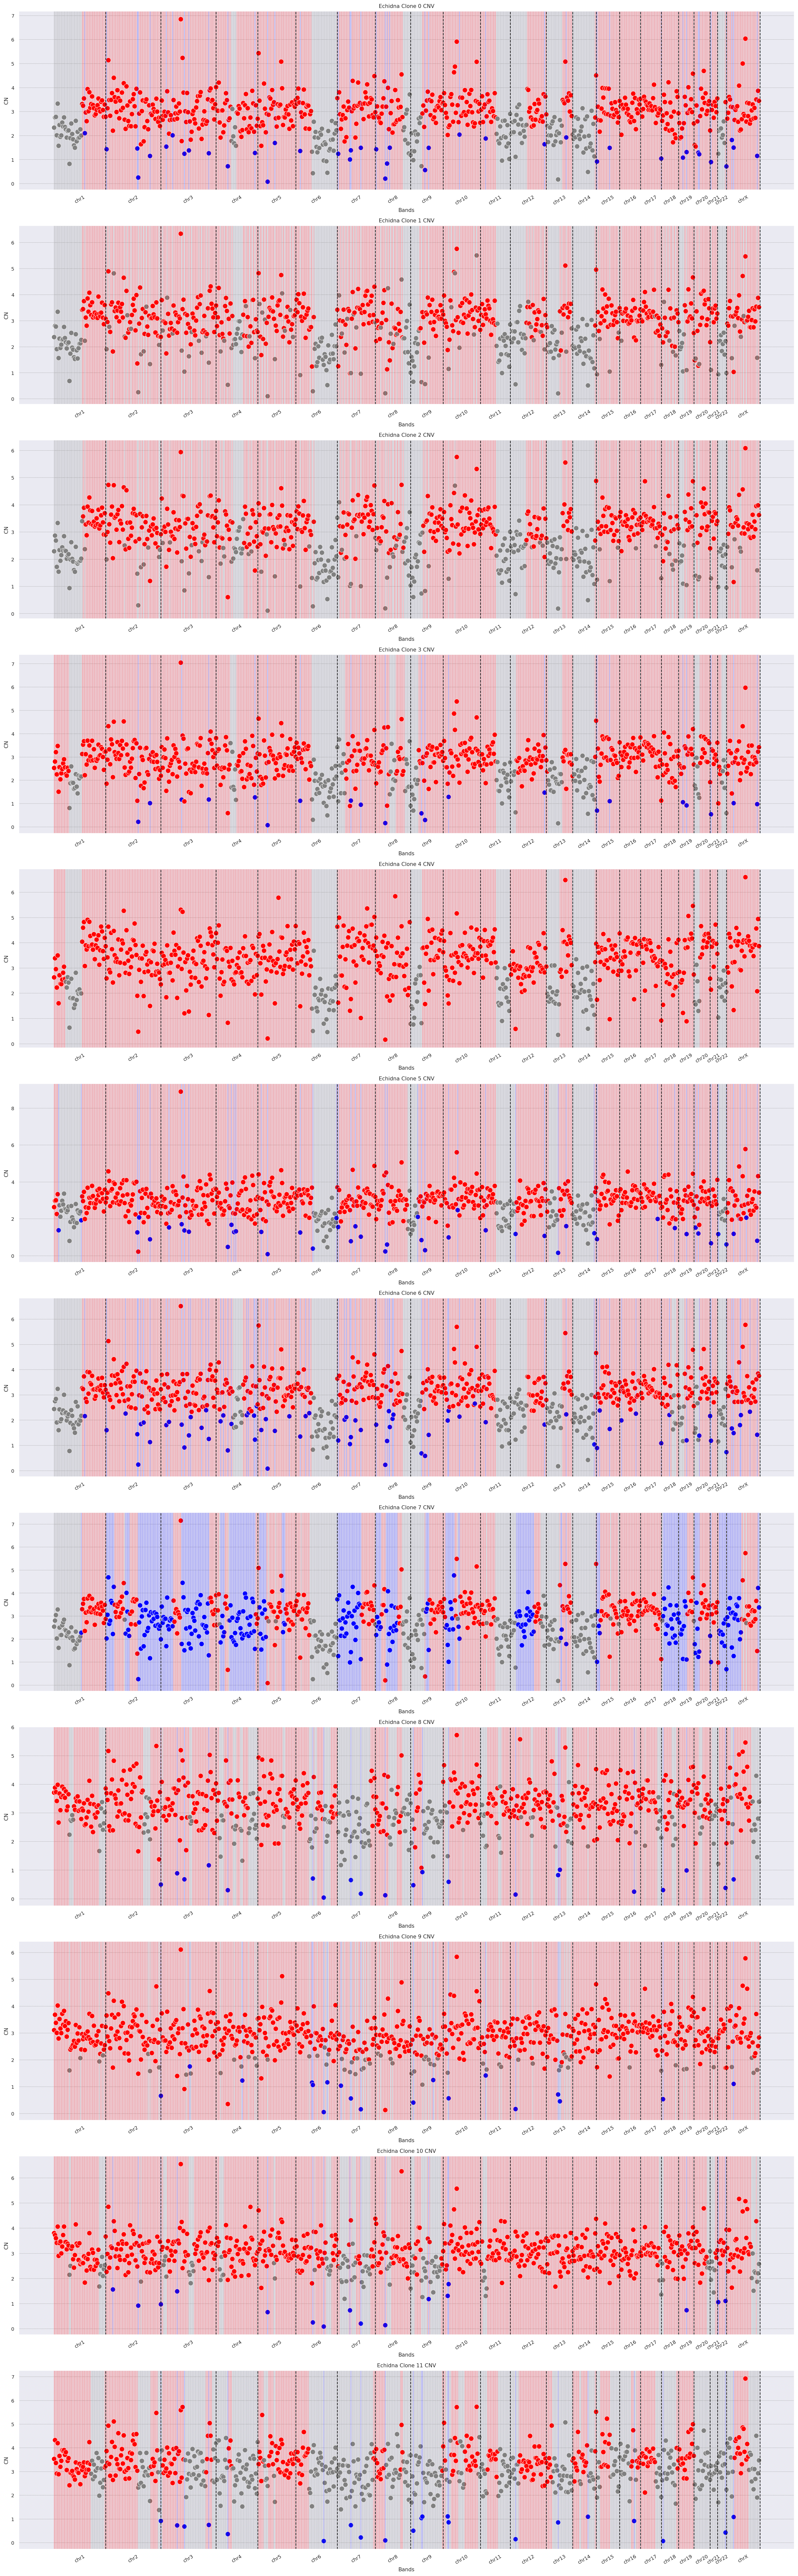

In [11]:
ec.pl.plot_cnv(adata)